In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('CSV/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'Score'})

In [5]:
df

,CustomerID,gender,age,income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
Score         0
dtype: int64

In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

,CustomerID,age,income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


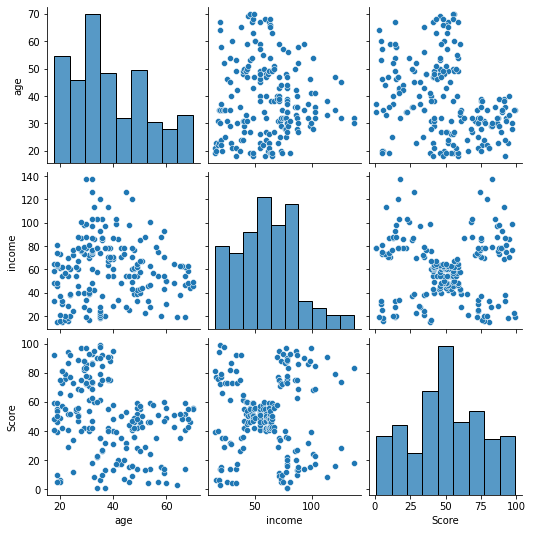

In [10]:
sns.pairplot(df[['age','income','Score']])

In [11]:
kmeans=KMeans(n_clusters=5)

In [12]:
kmeans.fit(df[['income','Score']])

KMeans(n_clusters=5)

In [14]:
pd.DataFrame(kmeans.cluster_centers_,columns=['First','Second'])

,First,Second
0,86.538462,82.128205
1,88.200000,17.114286
2,25.727273,79.363636
3,55.296296,49.518519
4,26.304348,20.913043


In [15]:
df['income_clusters']=kmeans.labels_

In [16]:
df

,CustomerID,gender,age,income,Score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [17]:
df['income_clusters'].value_counts()

3    81
0    39
1    35
4    23
2    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='Score'>

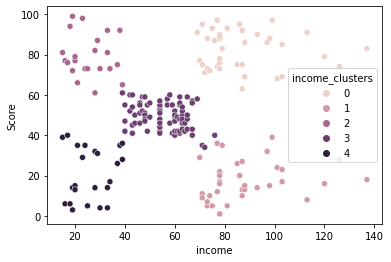

In [18]:
sns.scatterplot(x='income',y='Score',hue='income_clusters',data=df)